In [58]:
from tensorflow.keras import datasets, layers, models, preprocessing
import matplotlib.pyplot as plt

%matplotlib inline

max_features = 10000
max_length = 100

# load dataset
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=max_features)

# pad sequences into fixed length
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

x_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
        591,  202,   14,   31,    6,  717,   10,   10,    2,    2,    5,
          4,  360,    7,    4,  177, 5760,  394,  354,    4,  123,    9,
       1035, 1035, 1035,   10,   10,   13,   92,  124,   89,  488, 7944,
        100,   28, 1668,   14,   31,   23,   27, 7479,   29,  220,  468,
          8,  124,   14,  286,  170,    8,  157,   46,    5,   27,  239,
         16,  179,    2,   38,   32,   25, 7944,  451,  202,   14,    6,
        717], dtype=int32)

In [59]:
# Build the model

def get_model():
    model = models.Sequential()
    
    # 8 = embedding dimension
    model.add(layers.Embedding(max_features, 8, input_length=max_length))
    
    # flatten 3D tensors into 2D of shape (samples, max_length*8)
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    model.summary()
    return model

In [83]:
EPOCHS = 14
m = get_model()
history = m.fit(x_train, y_train, epochs=EPOCHS, batch_size=512, validation_split=0.2)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 100, 8)            80000     
_________________________________________________________________
flatten_18 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 801       
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/14
40/40 [==============================] - 0s 5ms/step - loss: 0.6909 - acc: 0.5416 - val_loss: 0.6876 - val_acc: 0.5774
Epoch 2/14
40/40 [==============================] - 0s 3ms/step - loss: 0.6708 - acc: 0.7153 - val_loss: 0.6607 - val_acc: 0.7066
Epoch 3/14
40/40 [==============================] - 0s 3ms/step - loss: 0.6223 - acc: 0.7818 - val_loss: 0.6034 - val_a

In [84]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['acc']
val_acc = history.history['val_acc']

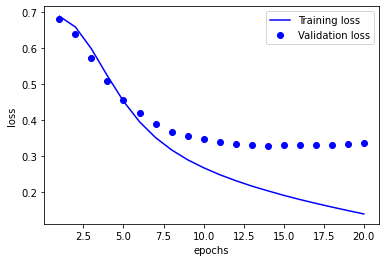

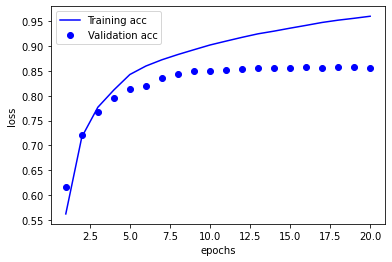

In [82]:
plt.plot(range(1, EPOCHS+1), train_loss, 'b', label='Training loss')
plt.plot(range(1, EPOCHS+1), val_loss, 'bo', label='Validation loss')
plt.xlabel('epochs') 
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(range(1, EPOCHS+1), train_acc, 'b', label='Training acc')
plt.plot(range(1, EPOCHS+1), val_acc, 'bo', label='Validation acc')
plt.xlabel('epochs') 
plt.ylabel('loss')
plt.legend()
plt.show()

In [79]:
m.evaluate(x_test, y_test)

782/782 [==============================] - 0s 383us/step - loss: 0.3527 - acc: 0.8459


[0.35269951820373535, 0.8458799719810486]